Data Postprocessing - Temperature Data
==============

**Authors:** Sergio A. Dorado-Rojas (sergio.dorado.rojas@gmail.com), Manuel Navarro Catalan (manosnavarro@gmail.com), Marcelo de Castro Fernandes (decasm3@rpi.edu) and Luigi Vanfretti (luigi.vanfretti@gmail.com)

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plot_temperature import*
import copy

In [2]:
# ======================================================
# IMPORTING DATA
# ======================================================

measurements = {'initialization': None,
                'line_opening': None,
                'bus_faults' : None}

# Sequential execution
with open('measurements_initialization.pkl', 'rb') as f:
    measurements['initialization'] = pickle.load(f)

# Multithreading execution
with open('measurements_line_opening.pkl', 'rb') as f:
    measurements['line_opening'] = pickle.load(f)
    
# Multiprocessing execution
with open('measurements_bus_faults.pkl', 'rb') as f:
    measurements['bus_faults'] = pickle.load(f)

## Temperature

In [3]:
# Instantiating dictionary of Pandas dataframes
df_temperature = {'Dymola' : {'initialization' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None} ,
                      'line_opening' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                      'bus_faults': {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None}},
         'OpenModelica' : {'initialization' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                           'line_opening' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                           'bus_faults': {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None}}}

# Iterating through measurements
for experiment in measurements:
    
    # Iterating through solvers
    for solver in list(measurements[experiment].keys()):
        # Iterating through tools
        for tool in list(measurements[experiment][solver].keys()):
            
            # Creating temporary dataframe
            df_temp = pd.DataFrame([], columns = measurements[experiment][solver][tool]['temperature'].keys())
            #print(df_temp.columns)
            
            for temp_sensor in measurements[experiment][solver][tool]['temperature'].keys():
                df_temp[temp_sensor] = measurements[experiment][solver][tool]['temperature'][temp_sensor]            
            
            # Adding time in seconds
            df_temp["Time"] = 0.2*np.arange(0, len(measurements[experiment][solver][tool]['temperature']['Core 0']))
            
            df_temperature[tool][experiment][solver] = copy.deepcopy(df_temp)
            
            # Cleaning temporary dataframe
            df_temp = None

/home/dorads/Documents/Google_Drive/03_Papers/01_Conference_Papers/04_2019_AmericanModelicaConference_II/05_SimulationCode/Time-Domain-Simulation-Performance-Benchmark/plot_temperature.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(figsize = (7, 5))


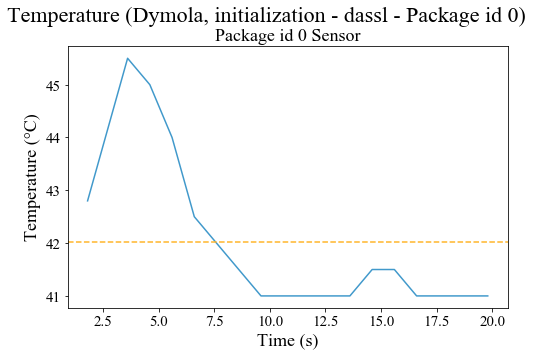

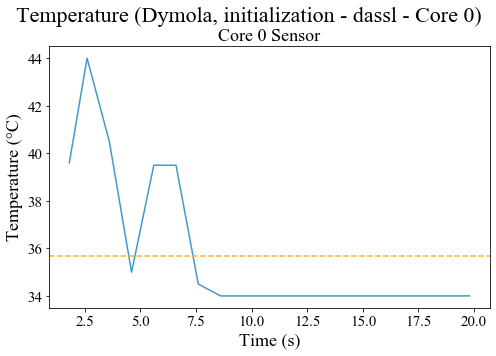

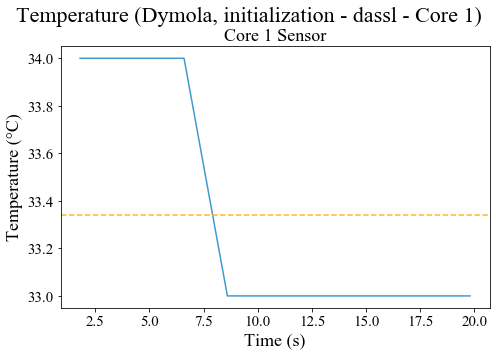

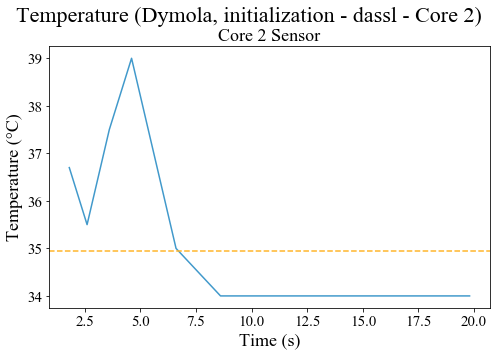

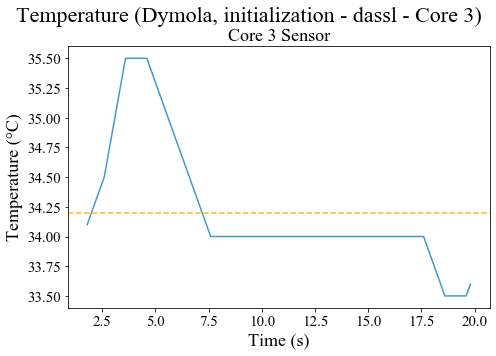

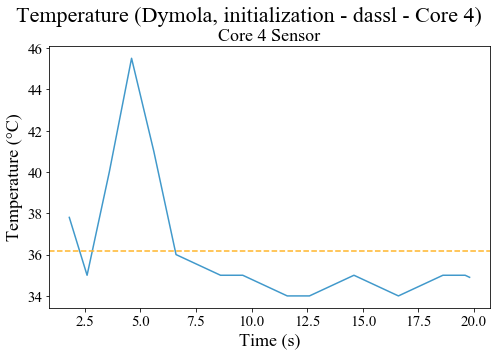

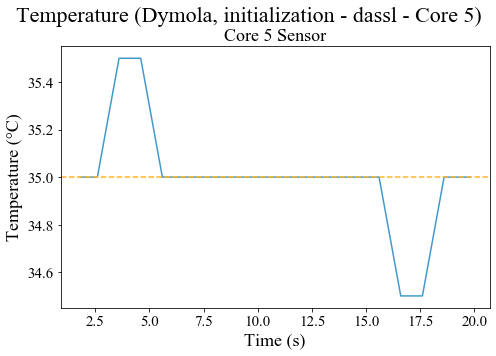

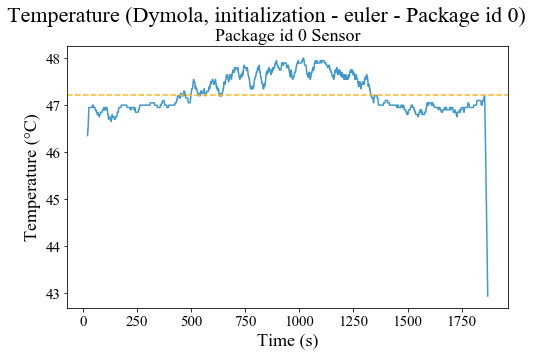

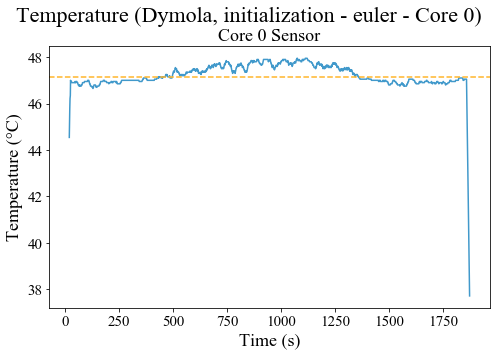

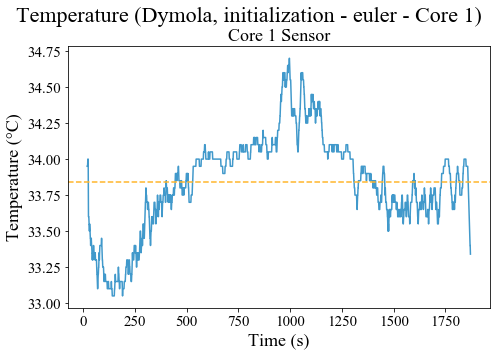

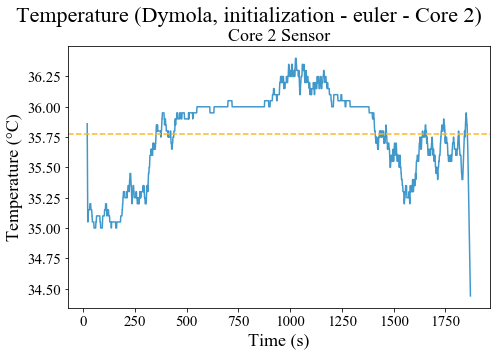

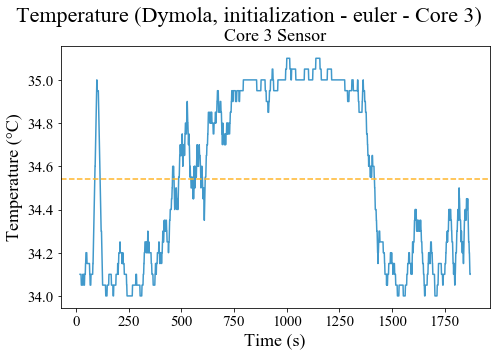

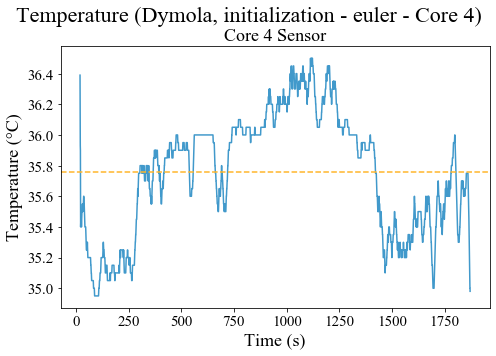

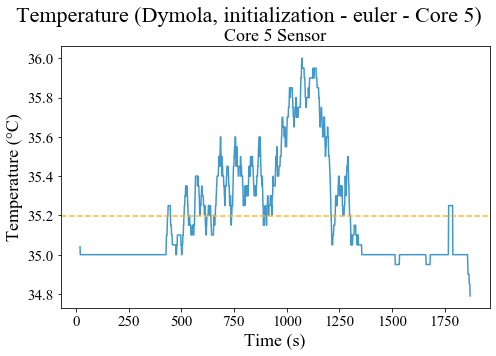

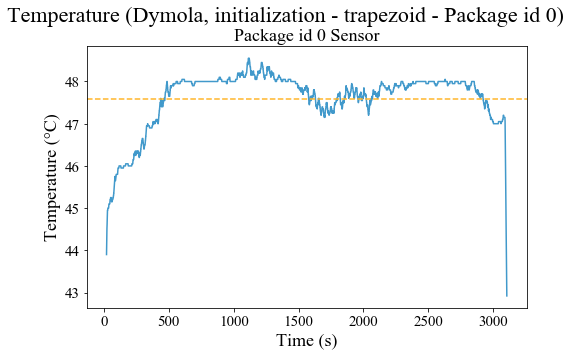

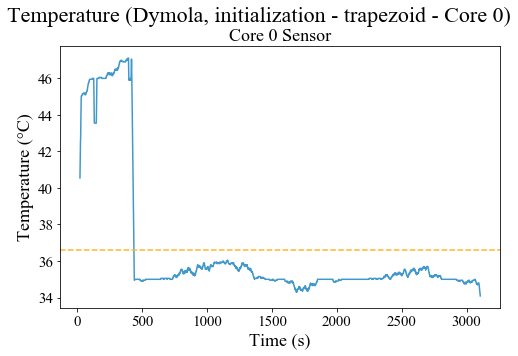

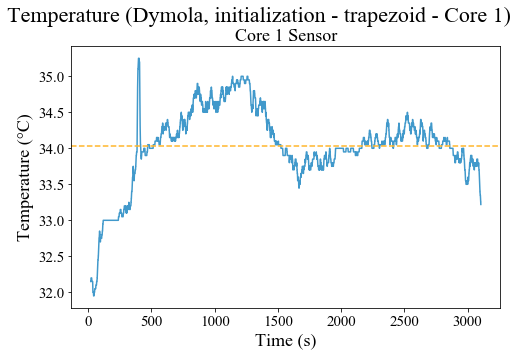

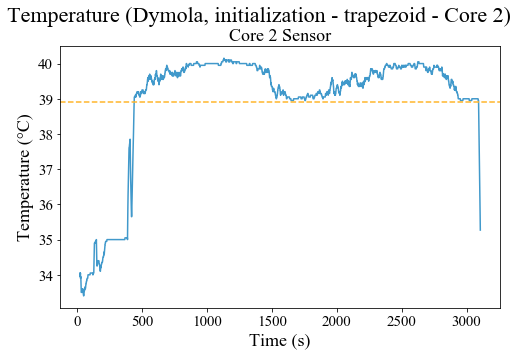

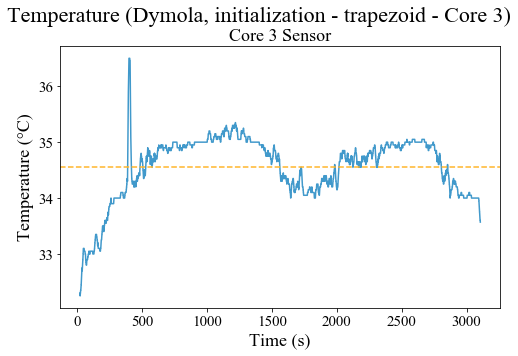

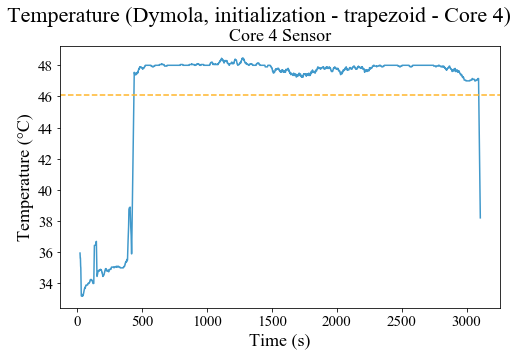

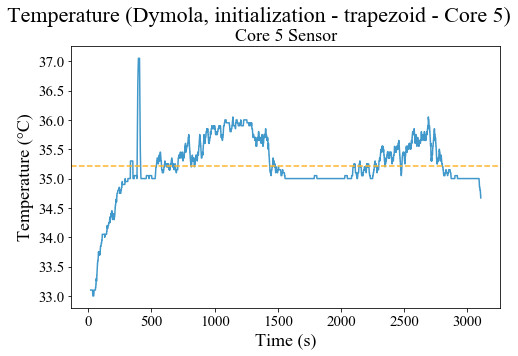

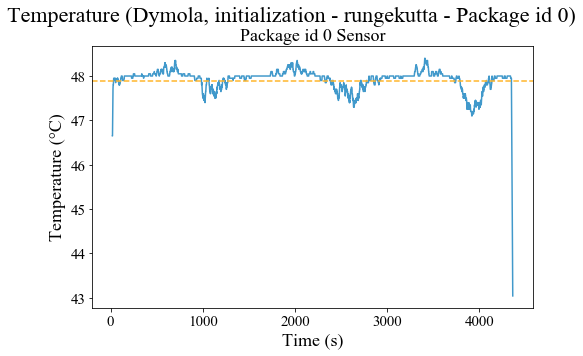

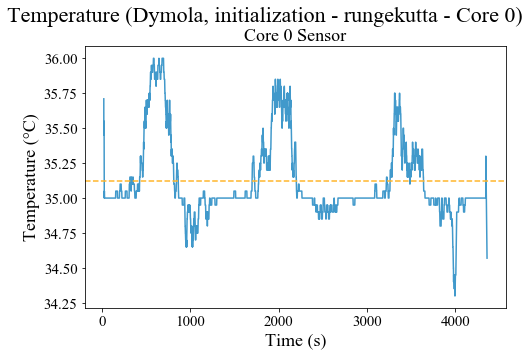

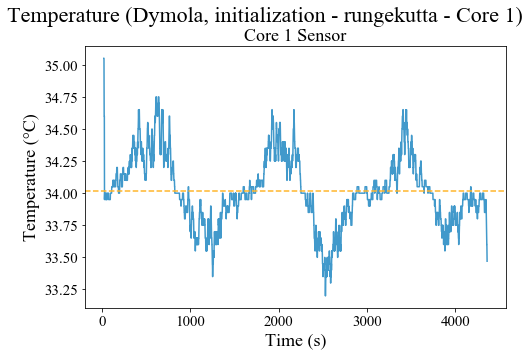

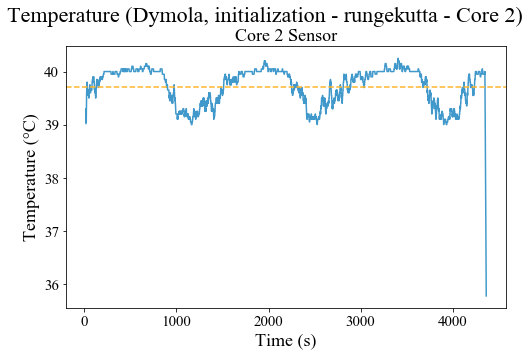

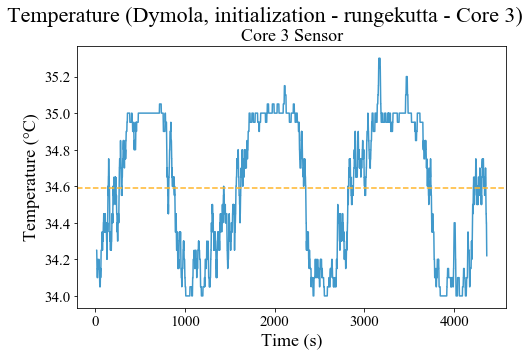

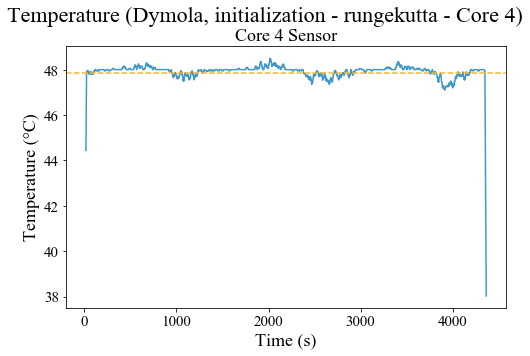

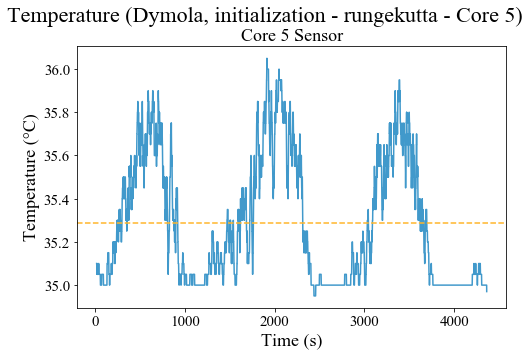

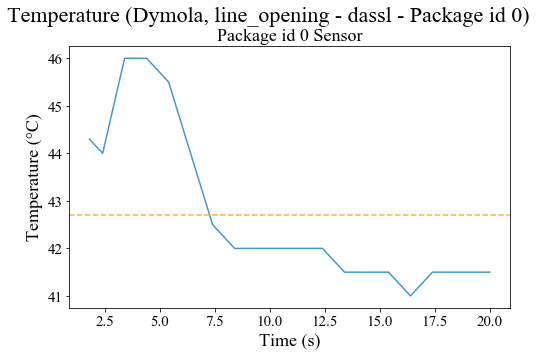

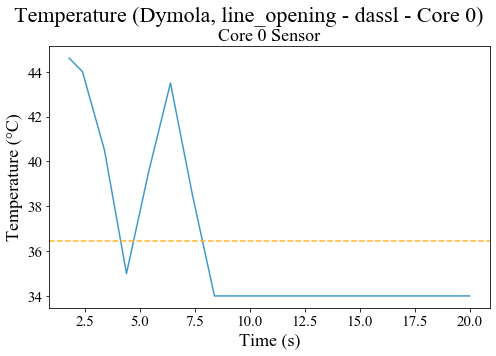

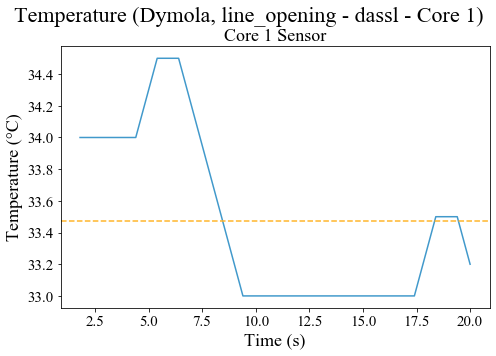

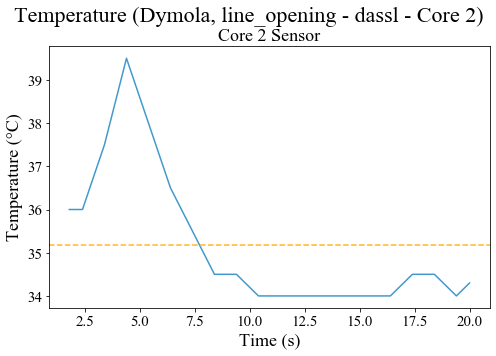

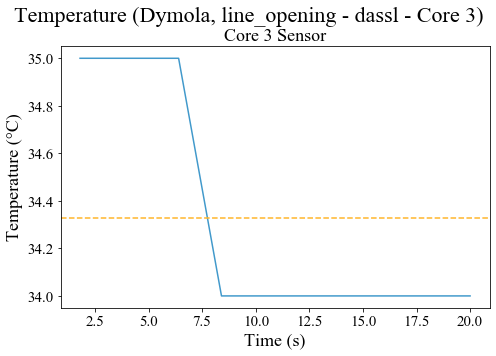

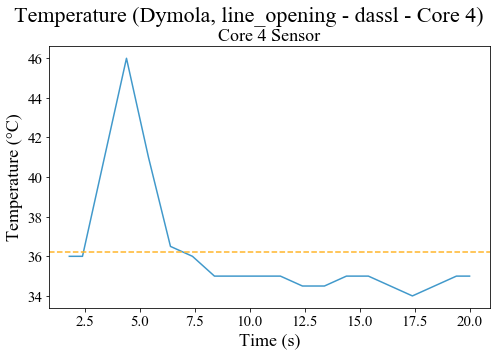

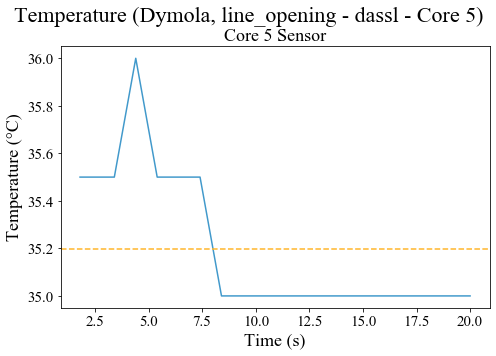

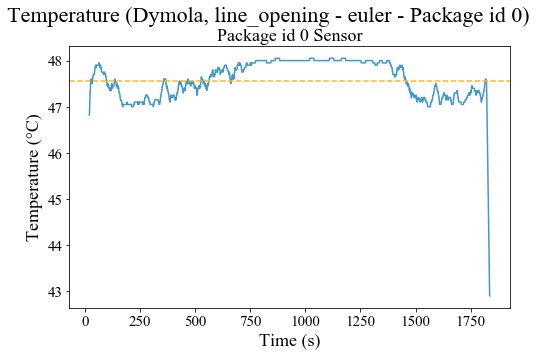

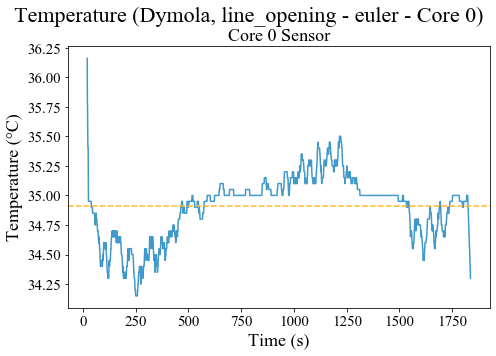

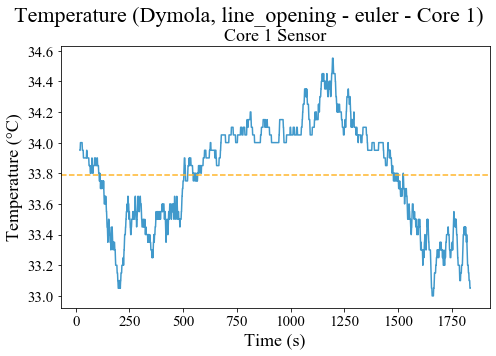

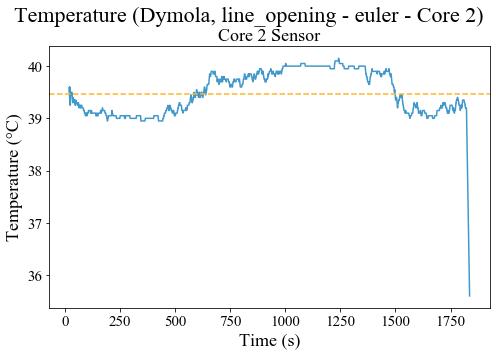

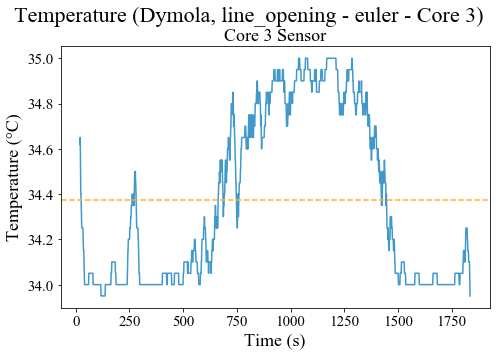

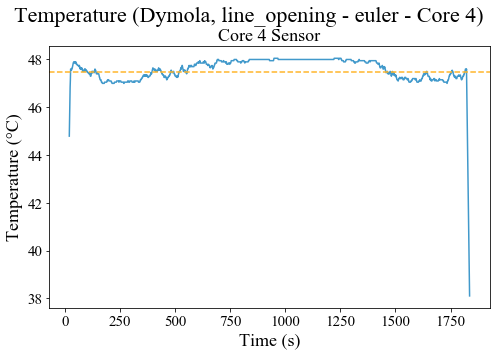

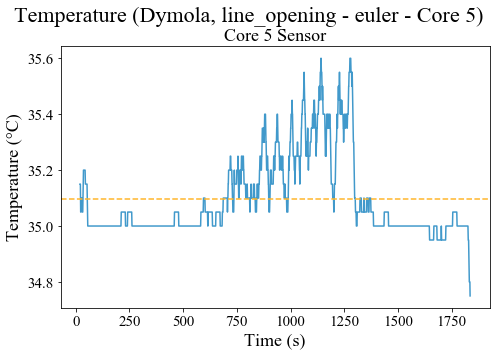

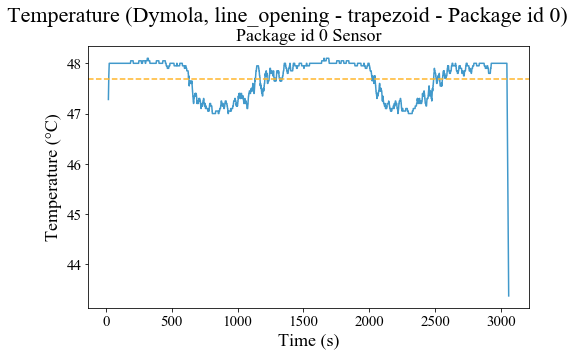

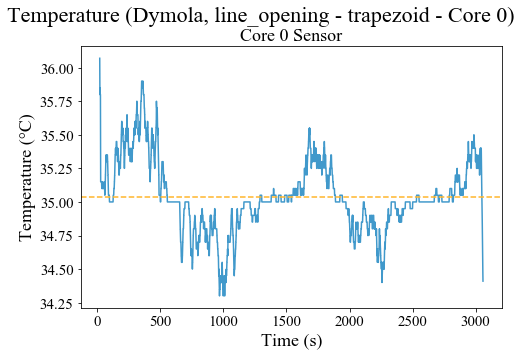

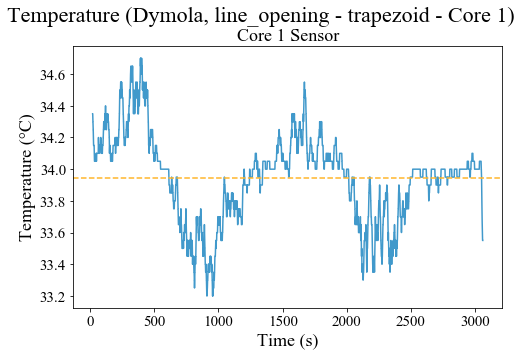

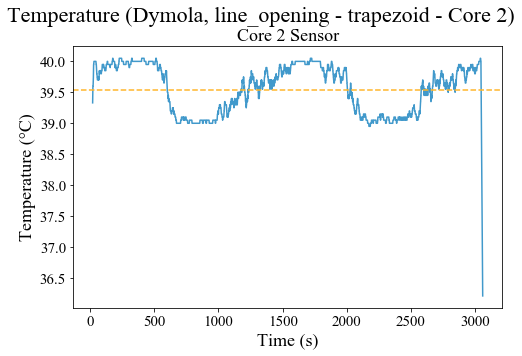

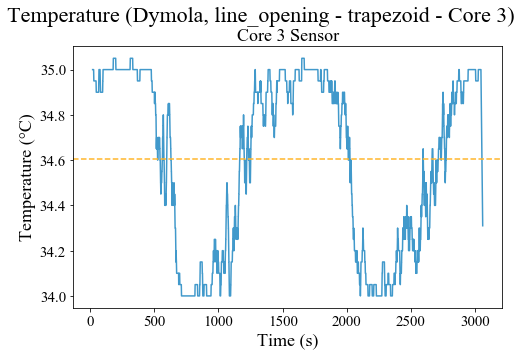

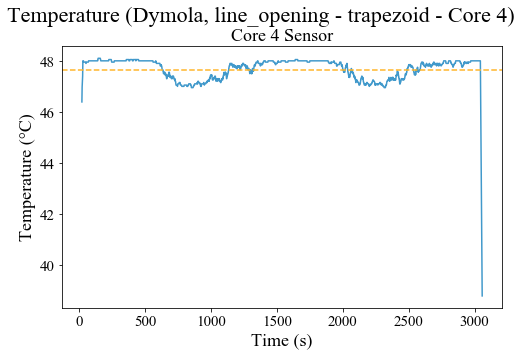

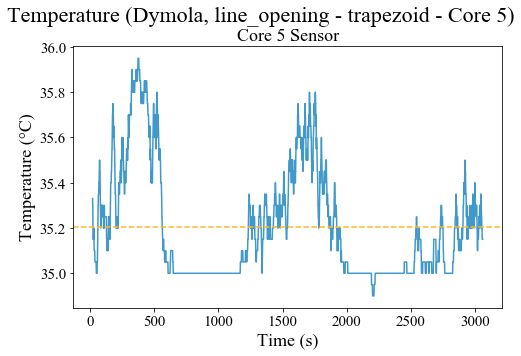

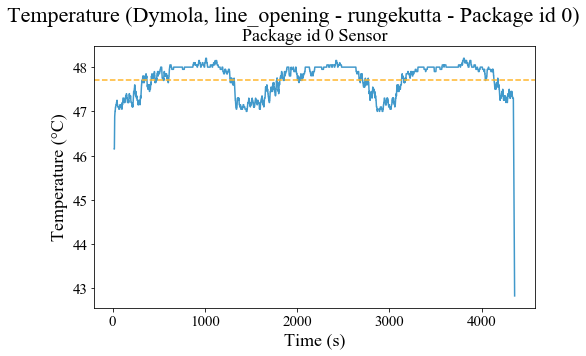

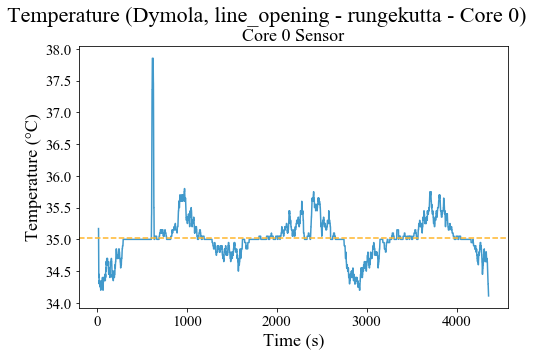

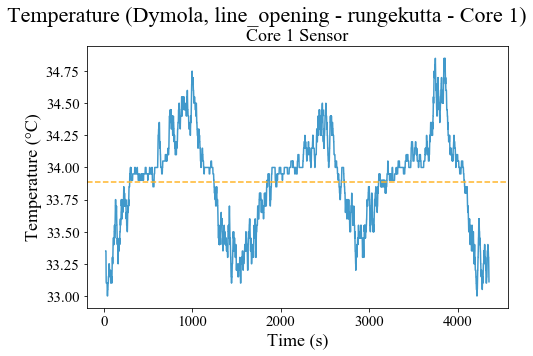

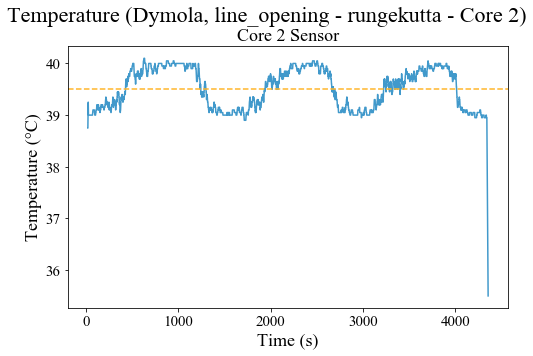

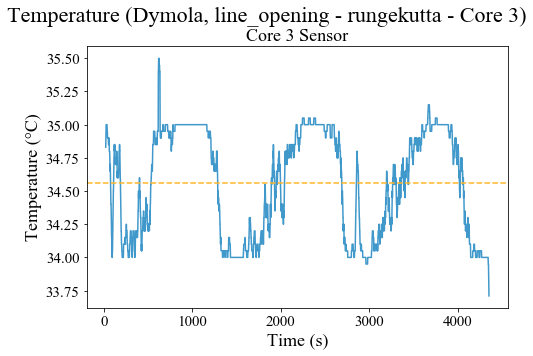

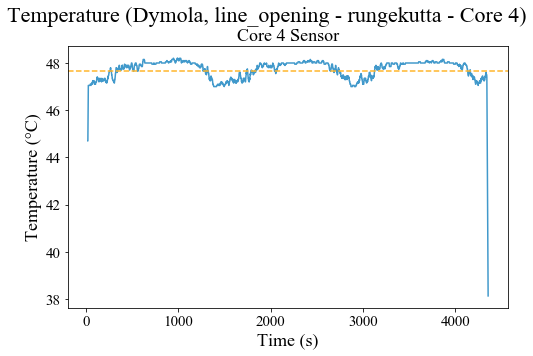

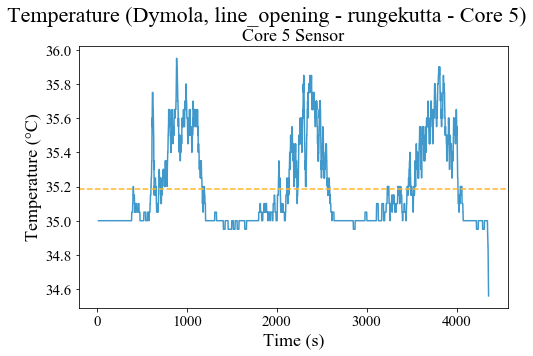

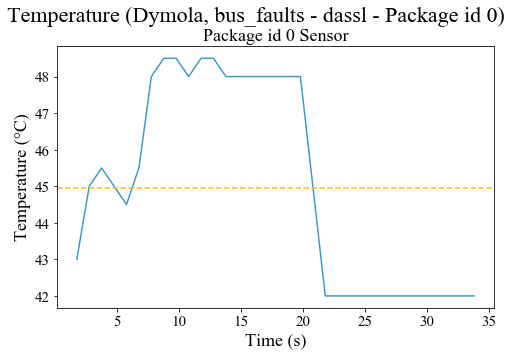

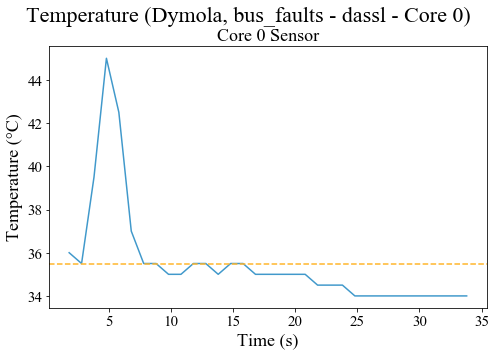

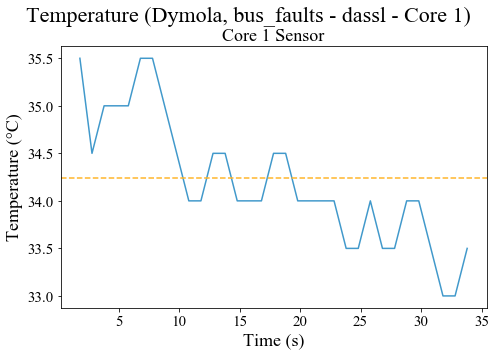

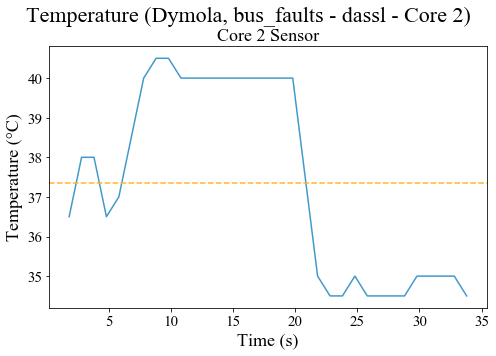

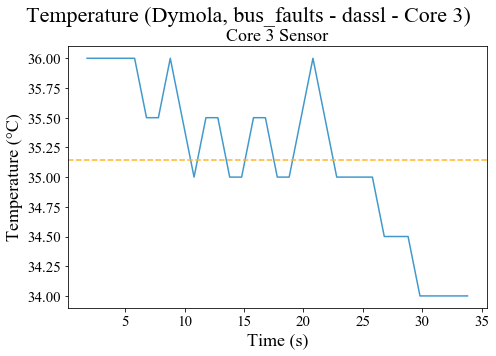

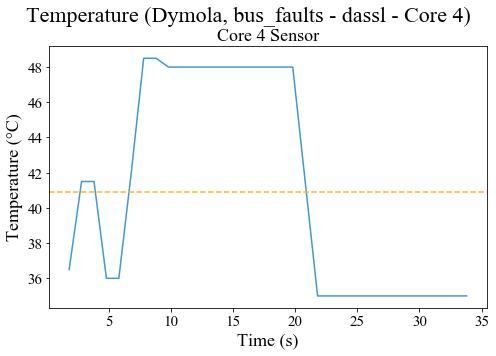

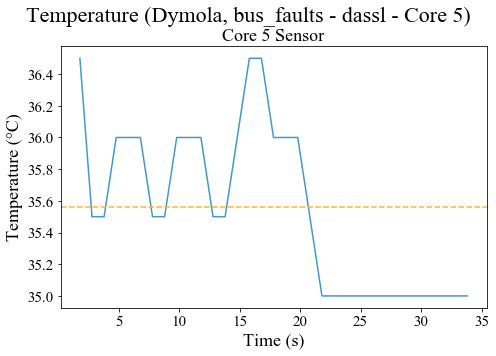

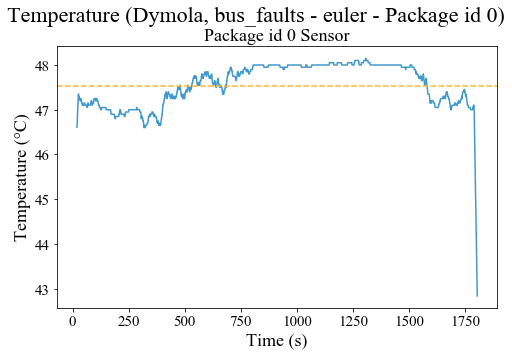

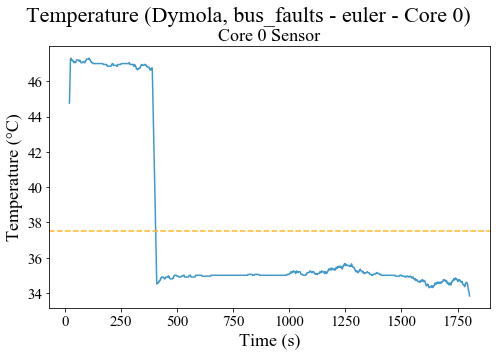

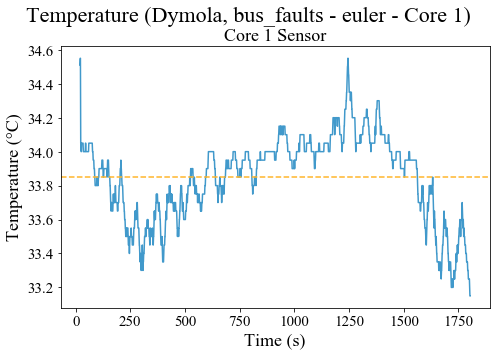

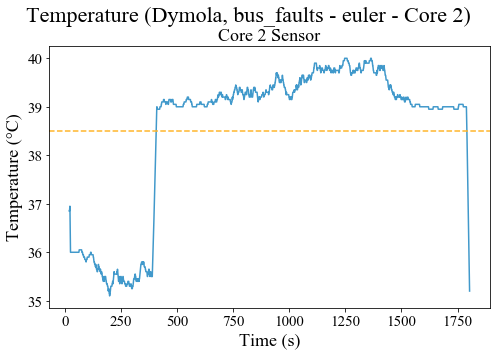

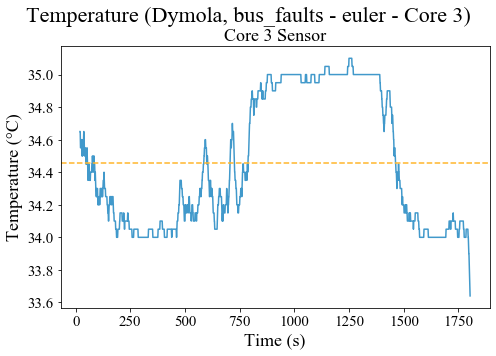

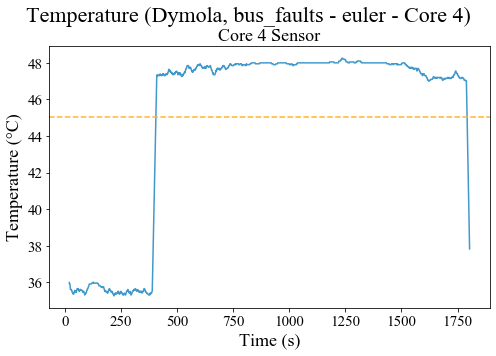

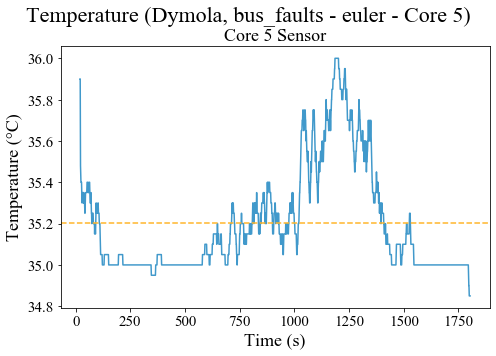

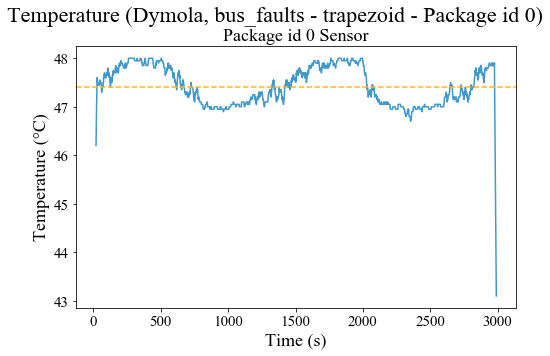

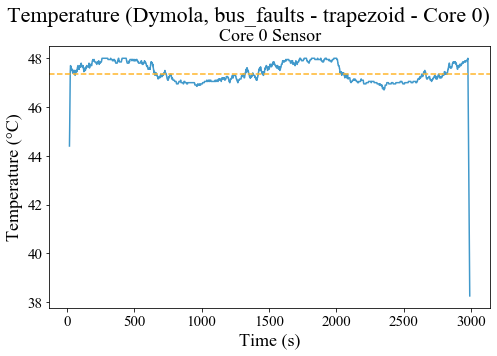

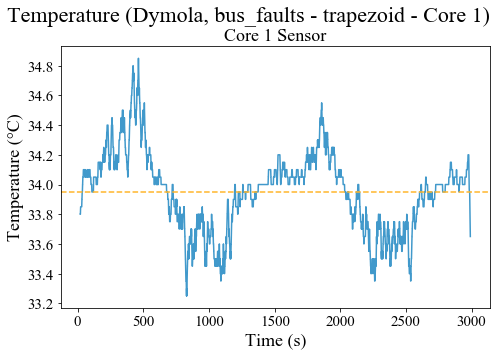

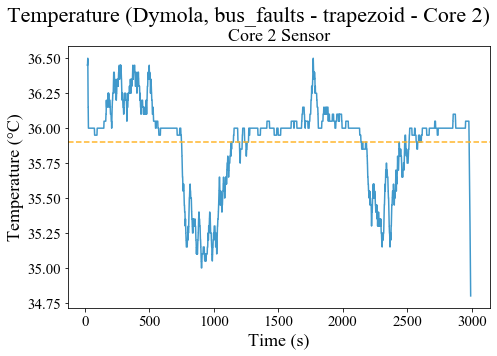

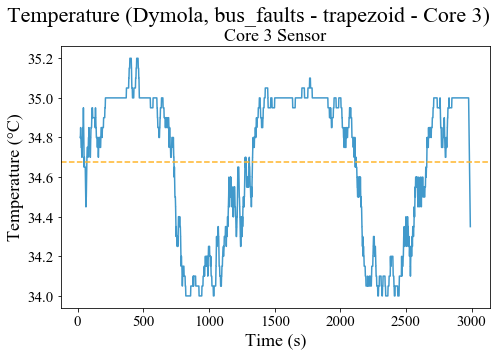

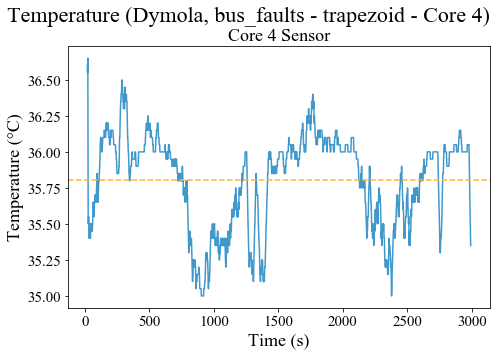

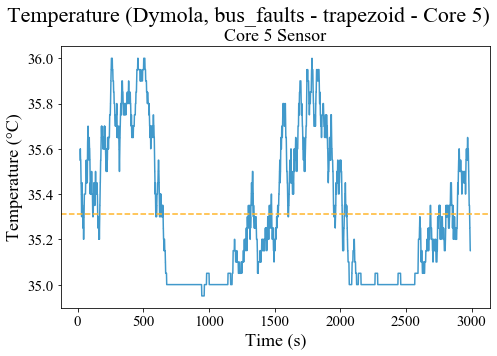

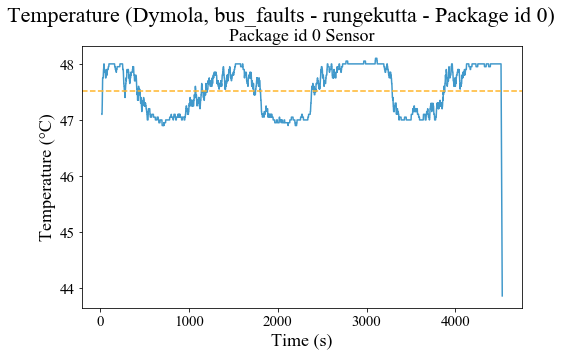

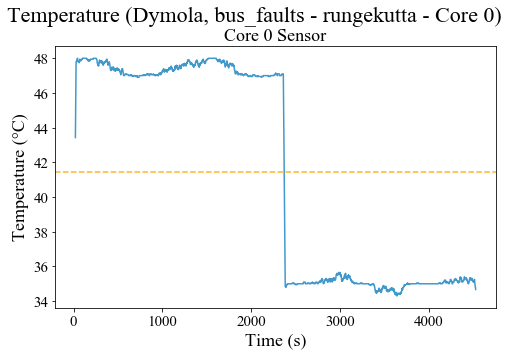

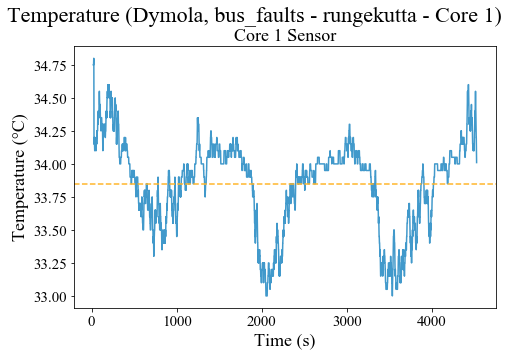

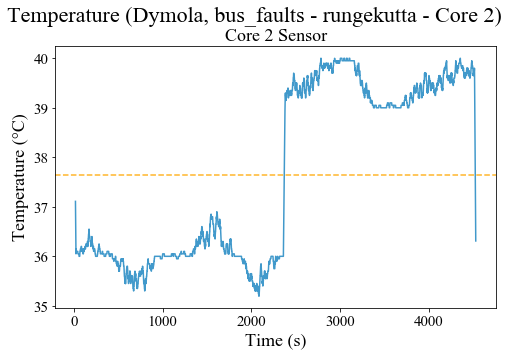

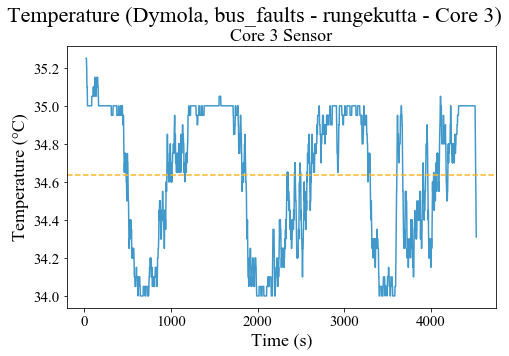

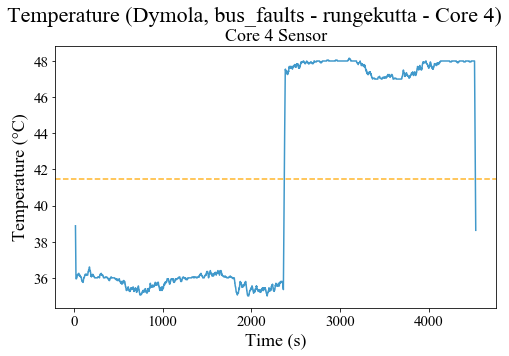

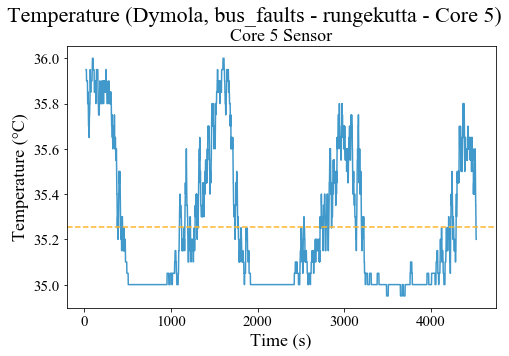

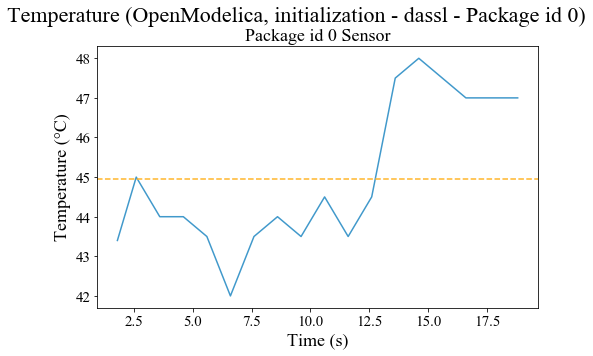

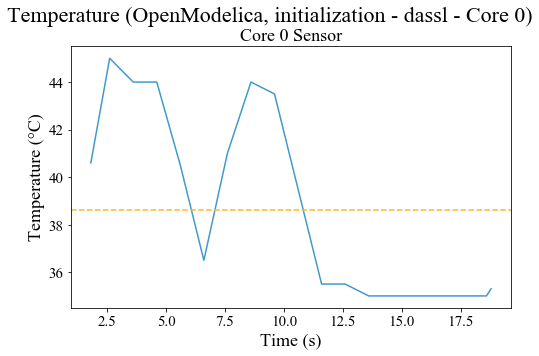

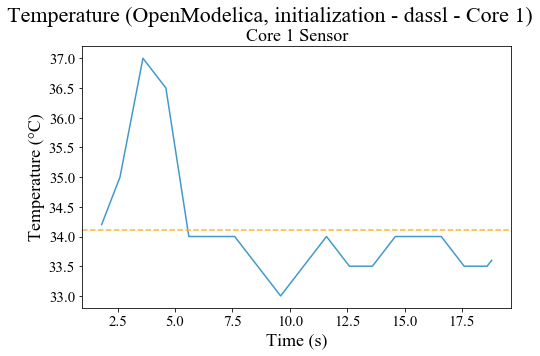

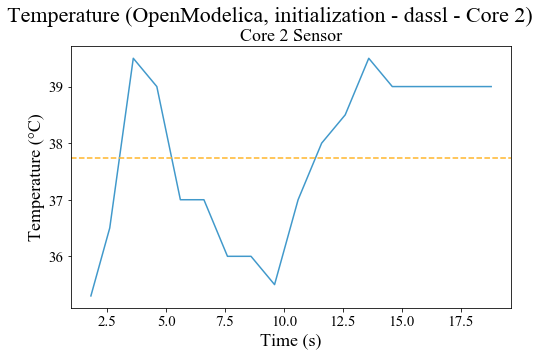

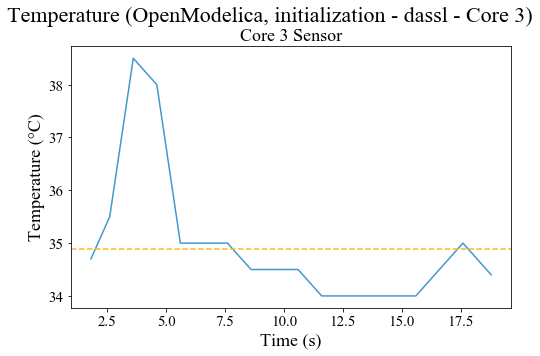

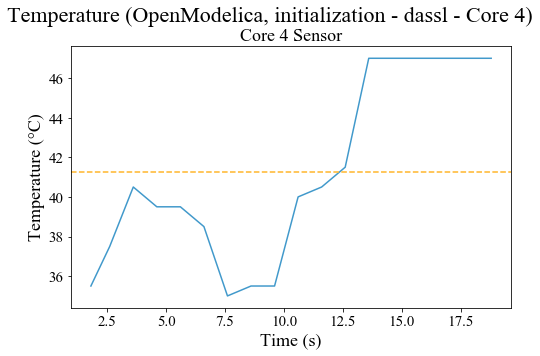

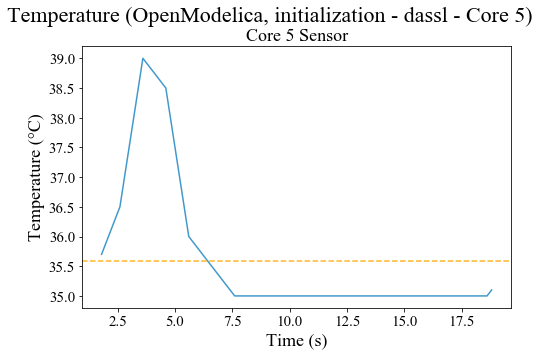

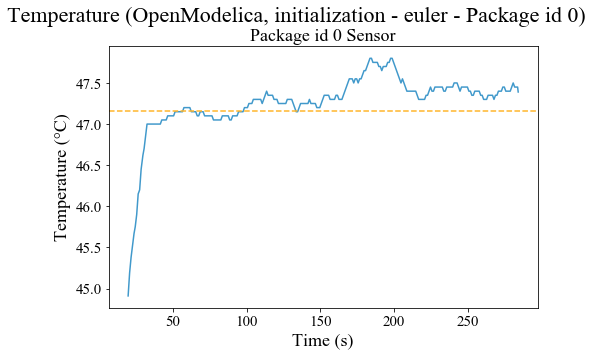

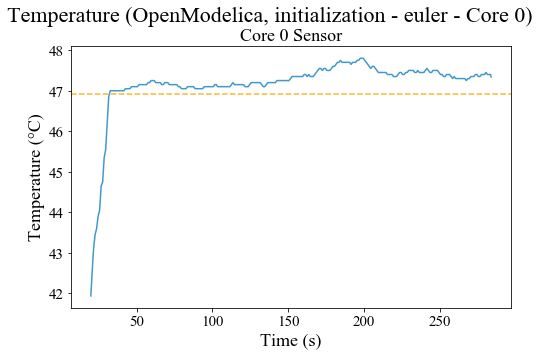

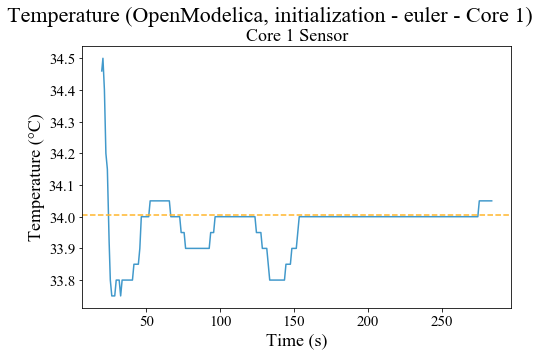

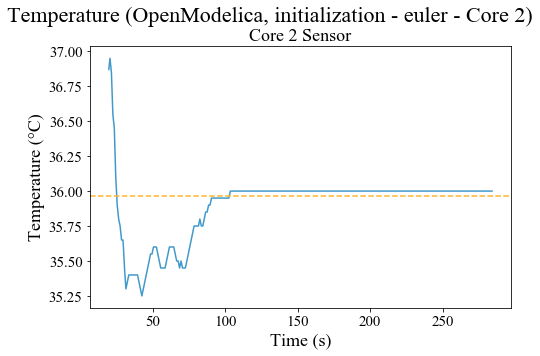

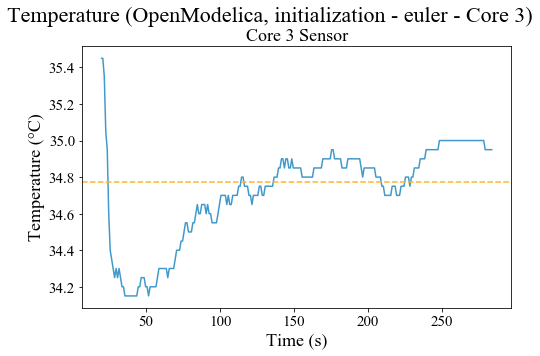

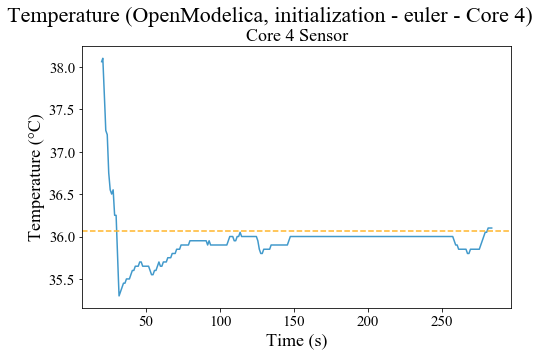

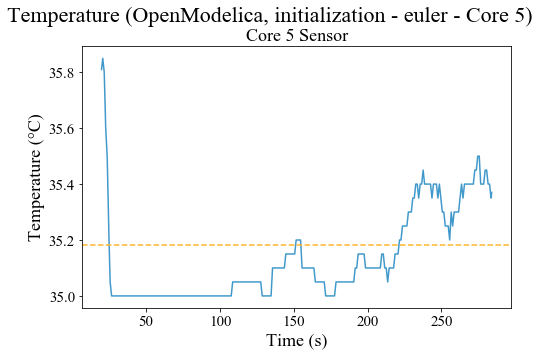

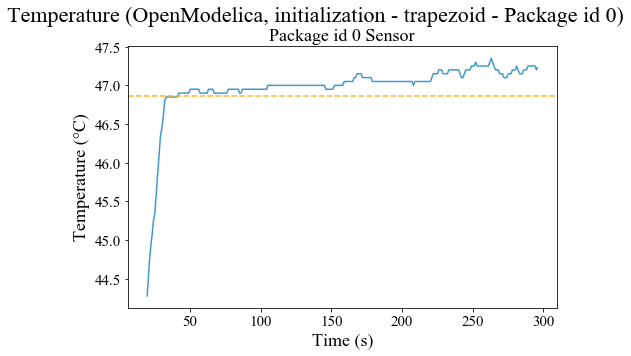

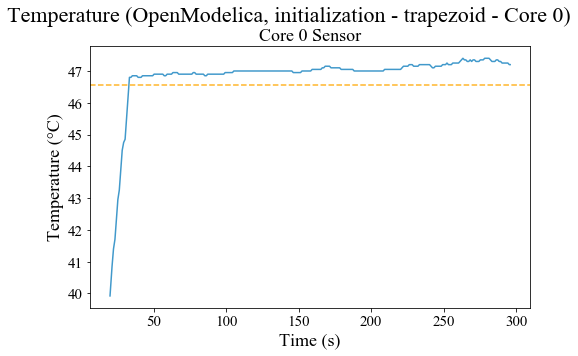

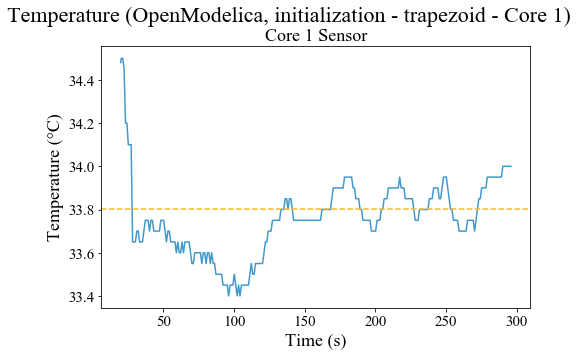

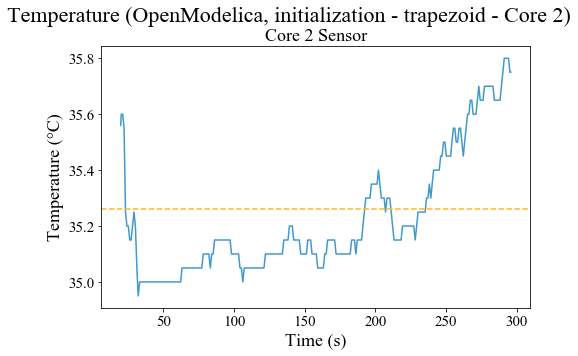

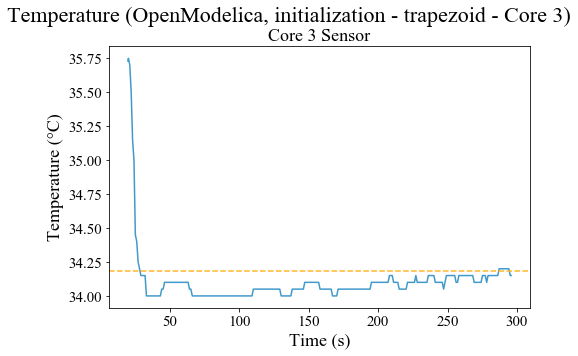

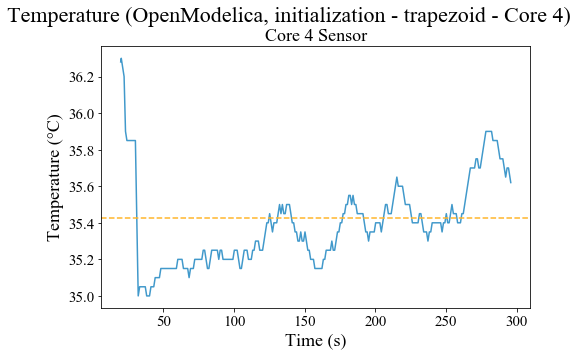

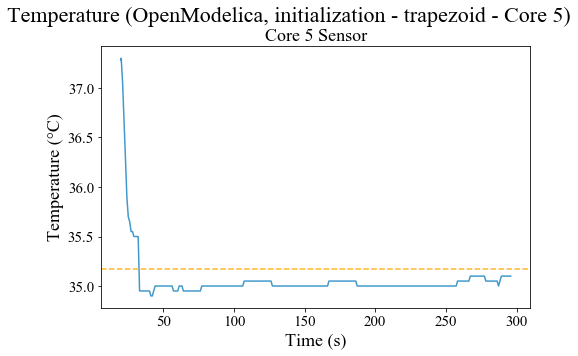

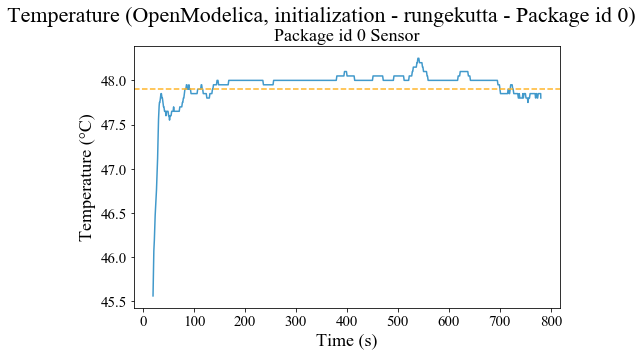

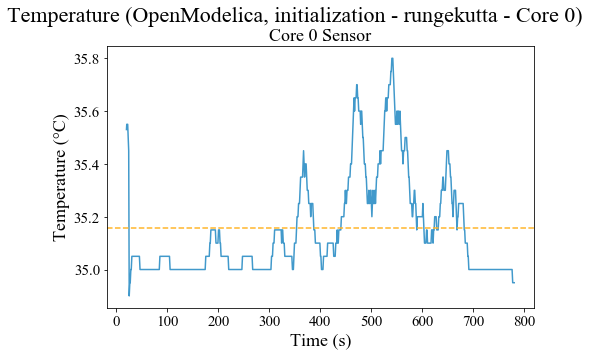

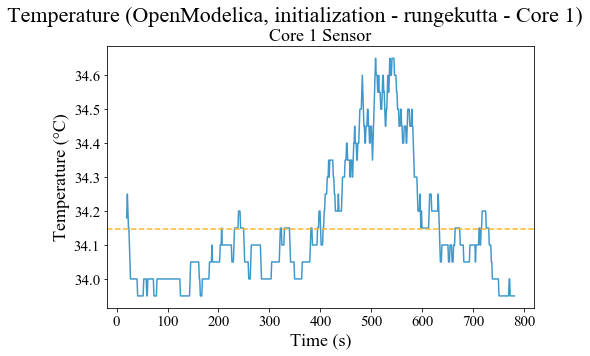

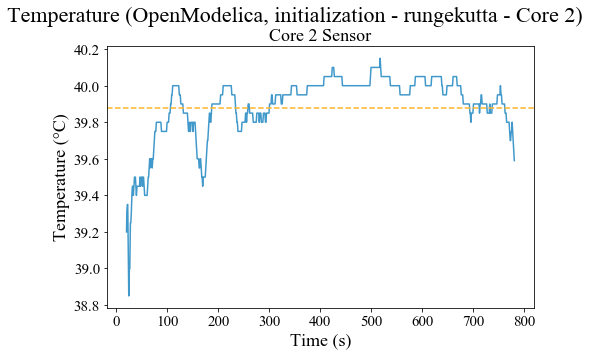

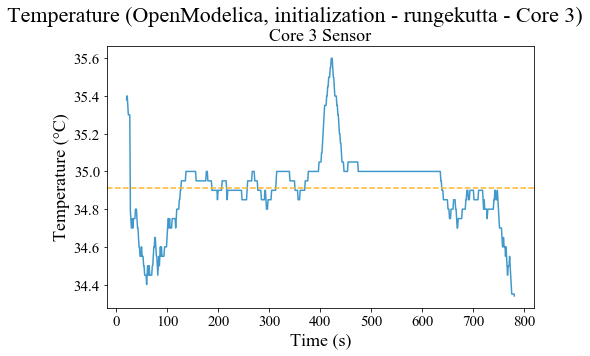

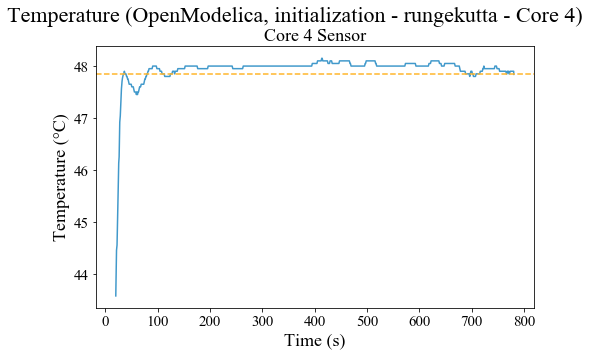

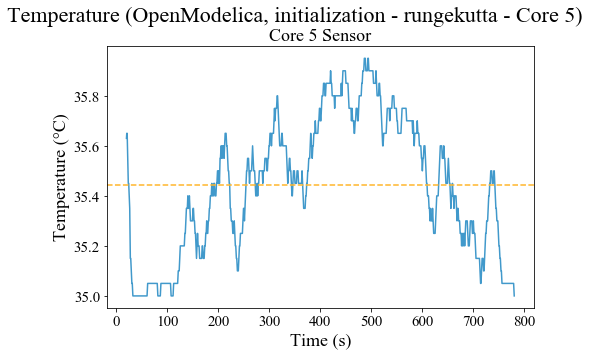

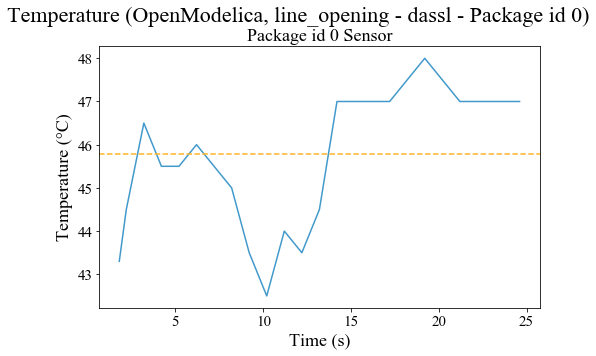

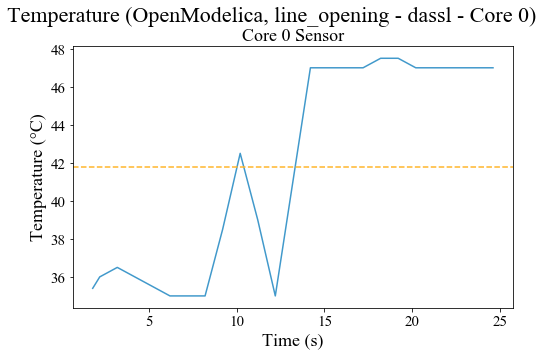

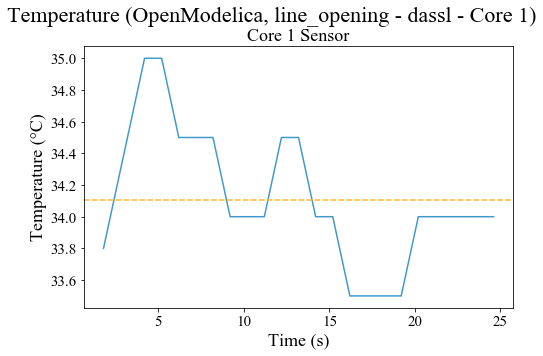

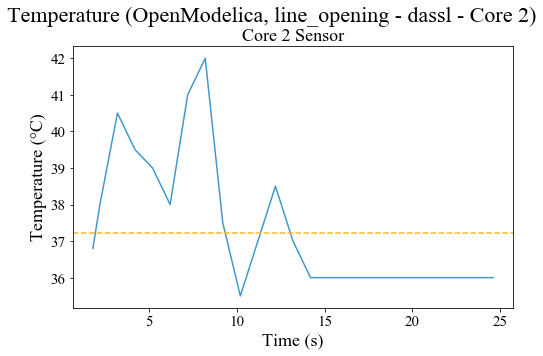

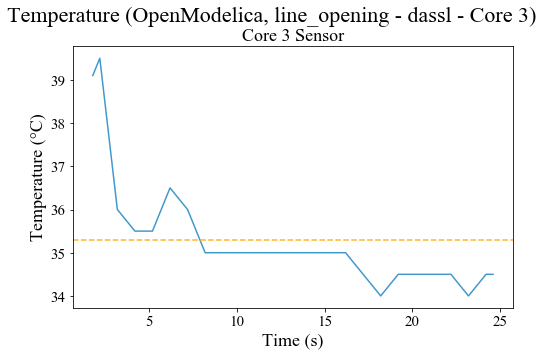

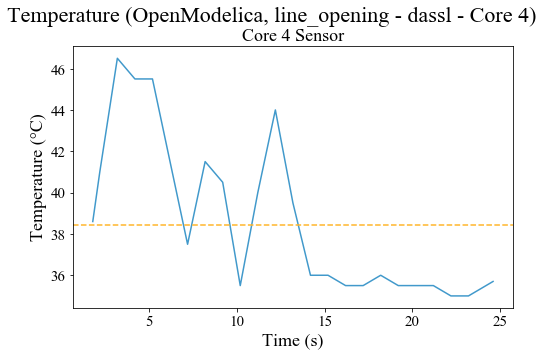

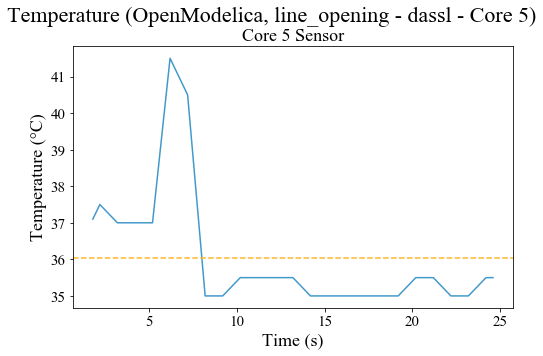

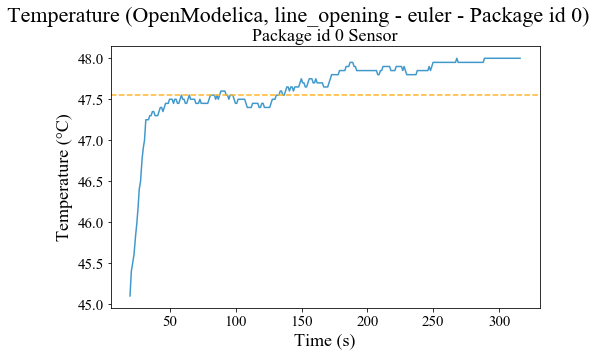

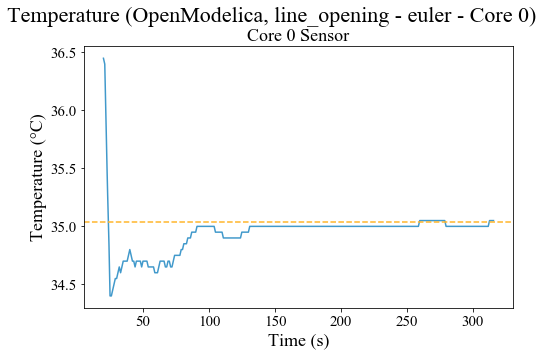

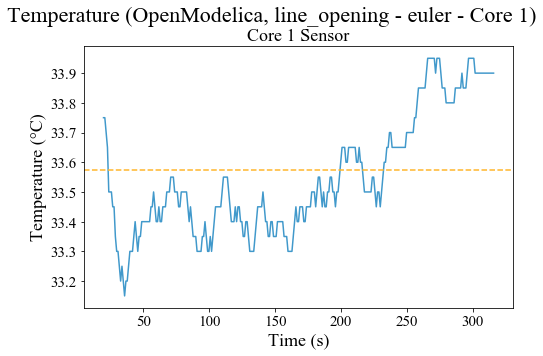

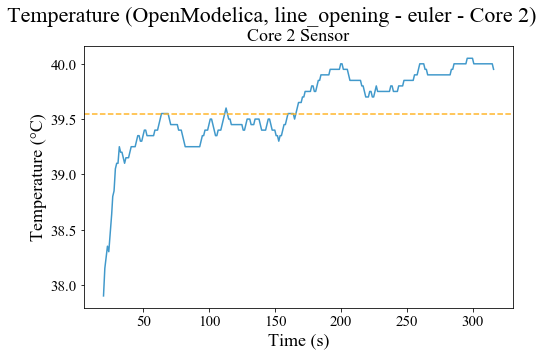

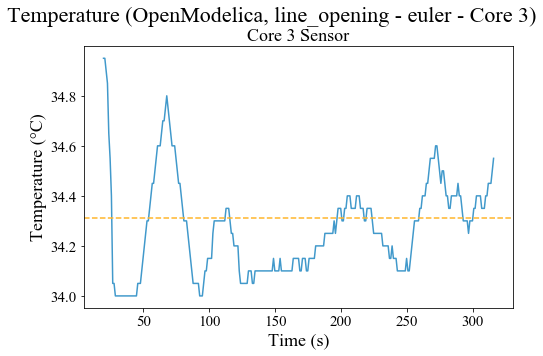

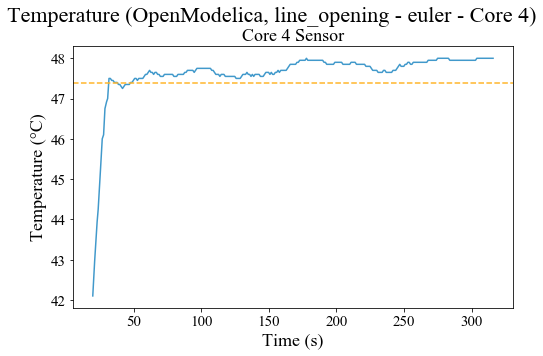

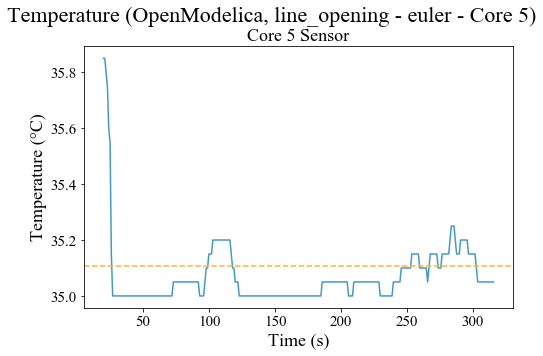

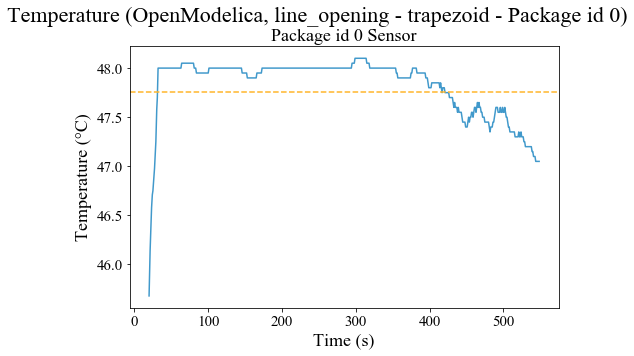

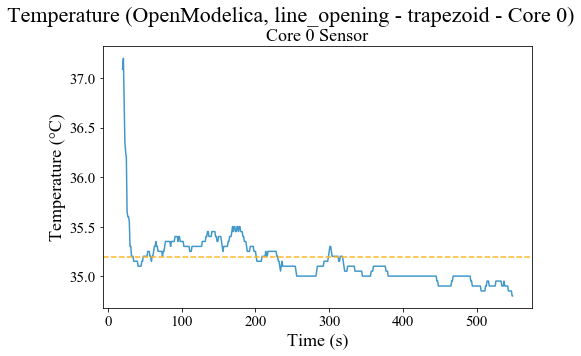

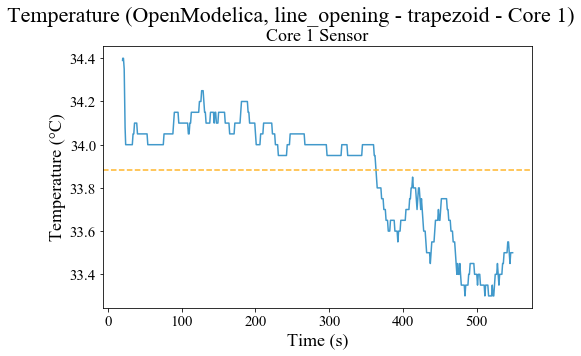

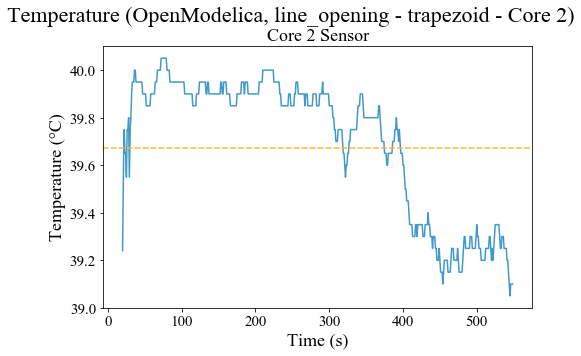

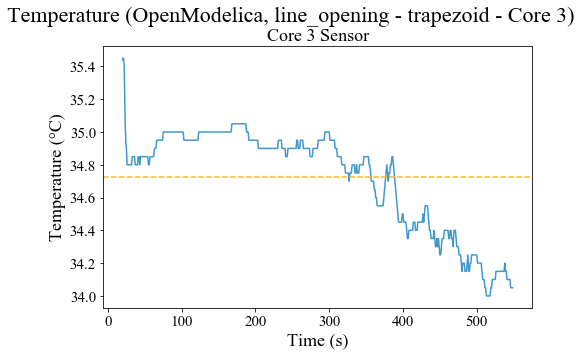

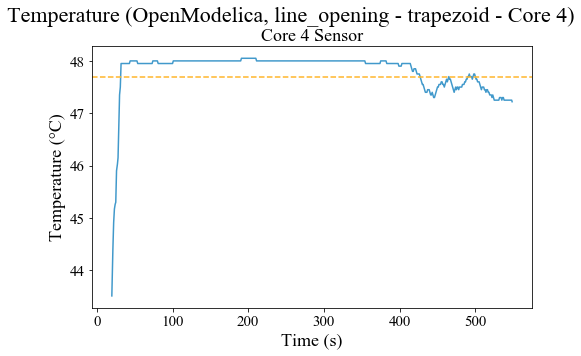

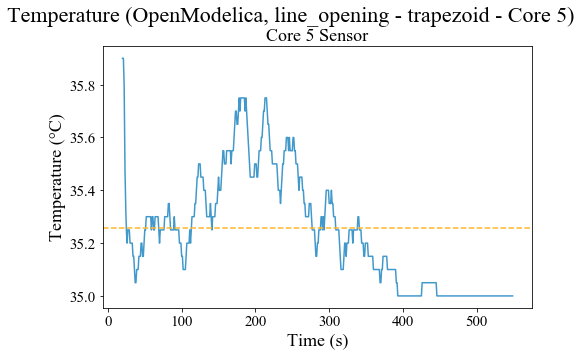

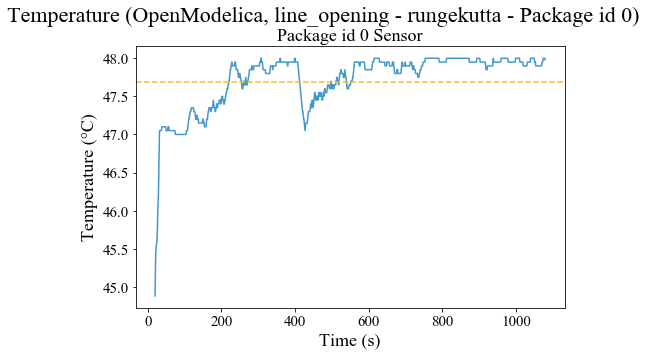

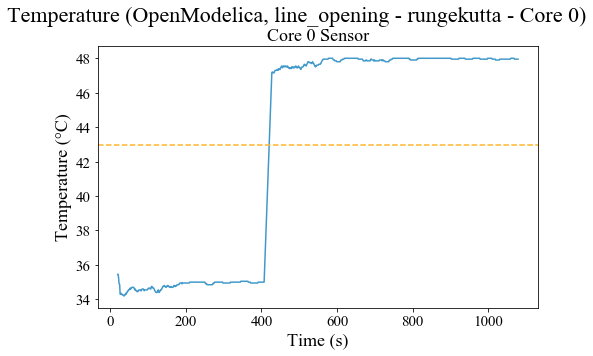

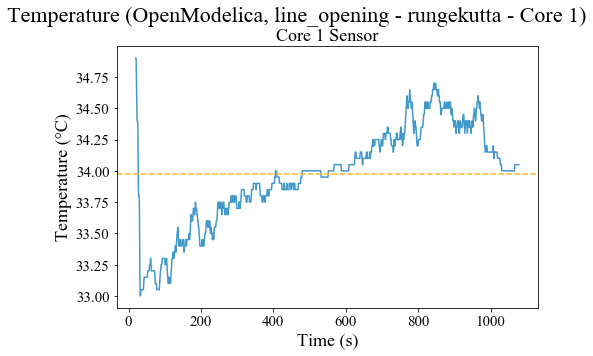

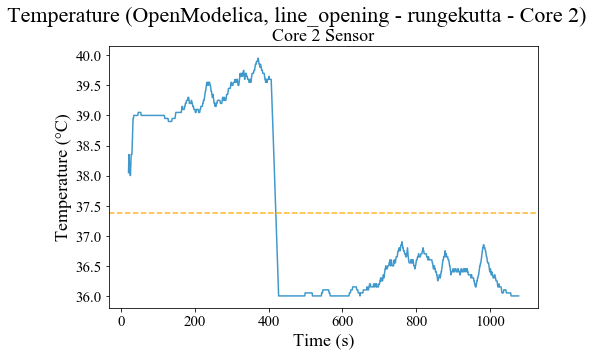

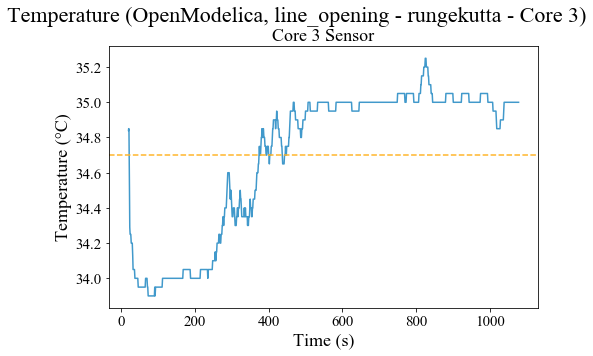

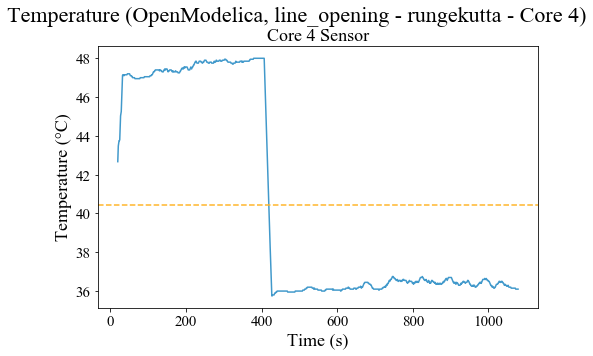

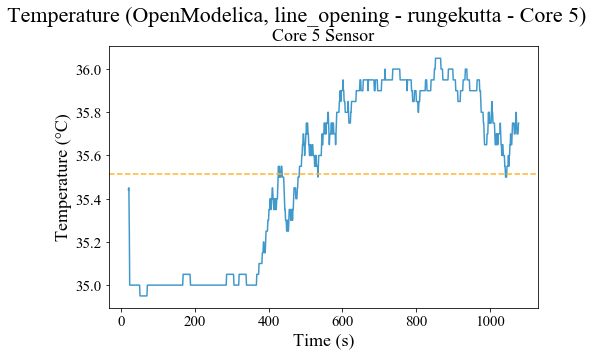

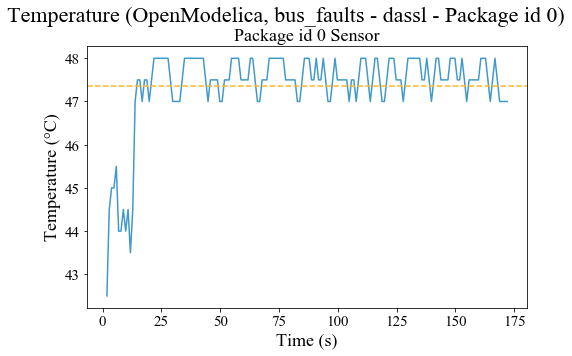

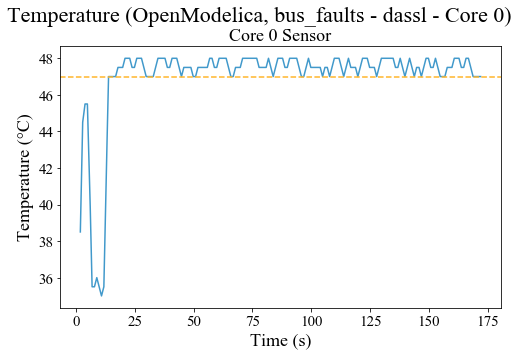

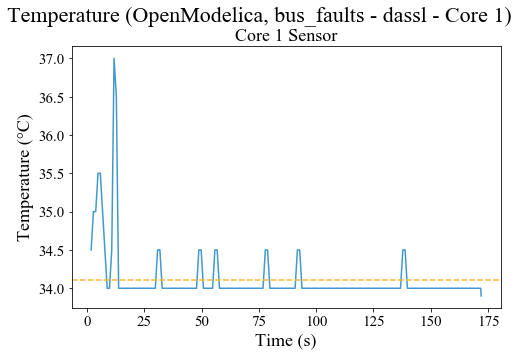

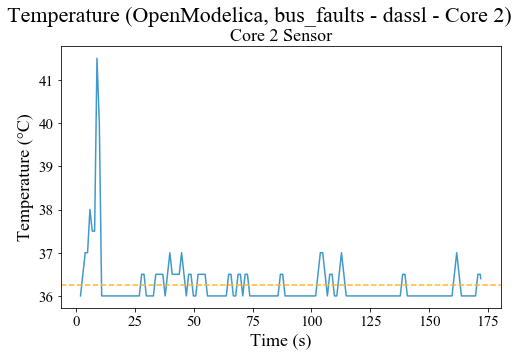

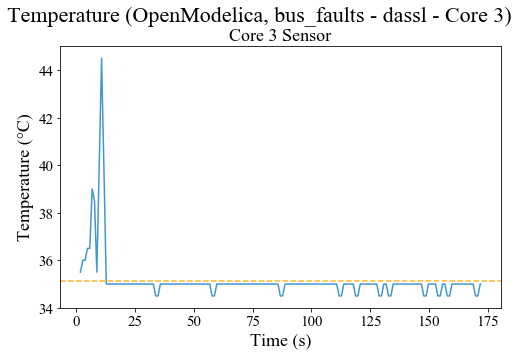

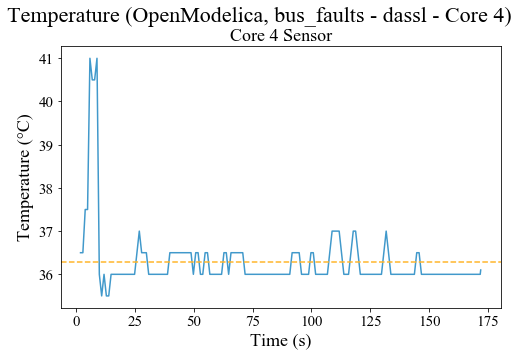

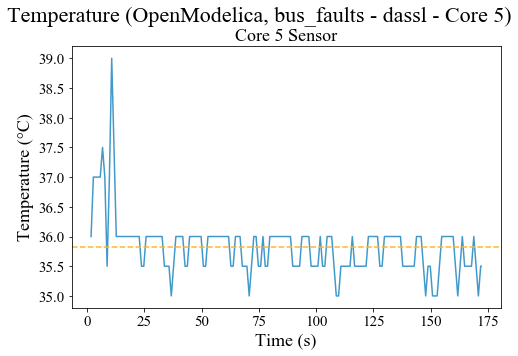

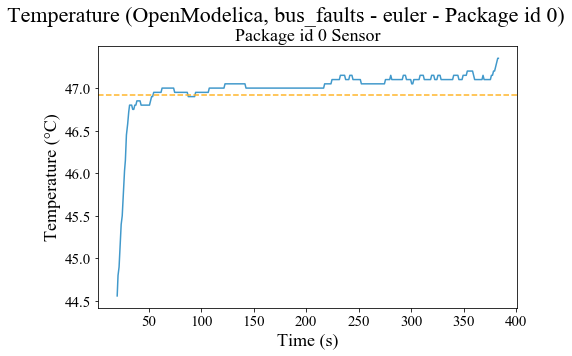

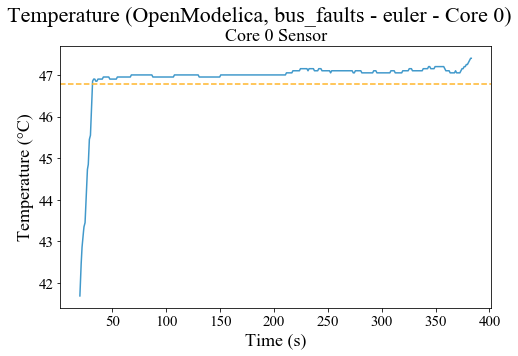

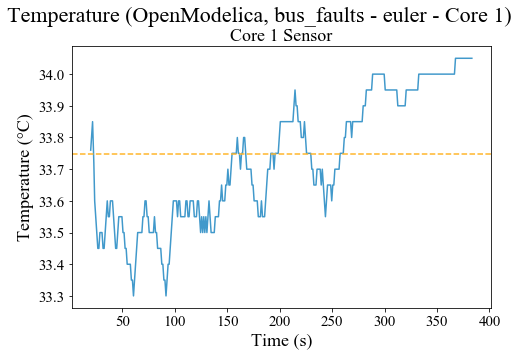

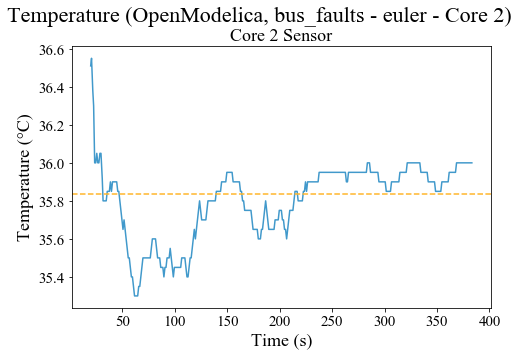

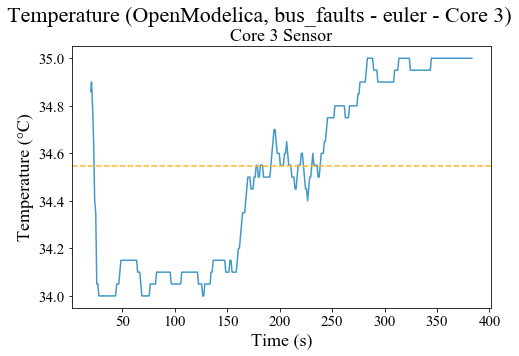

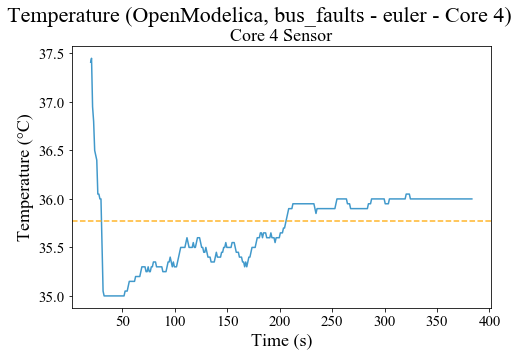

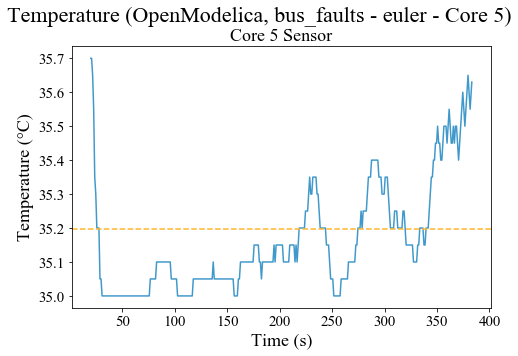

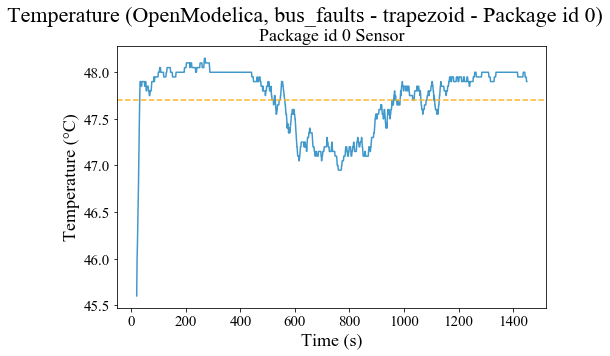

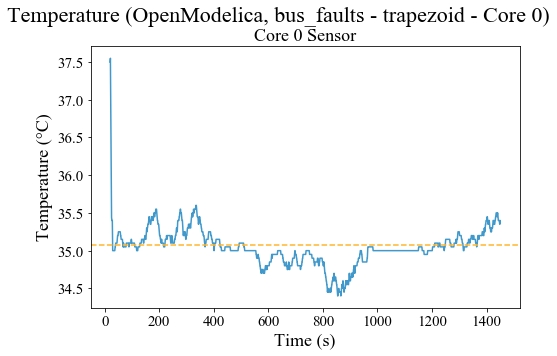

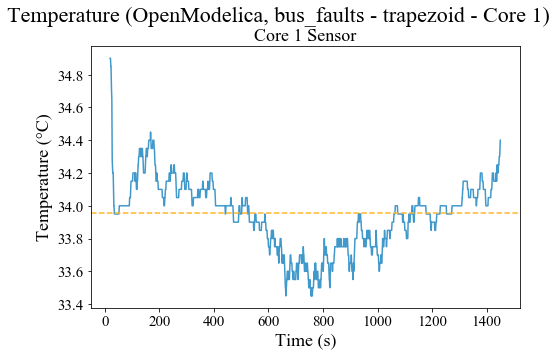

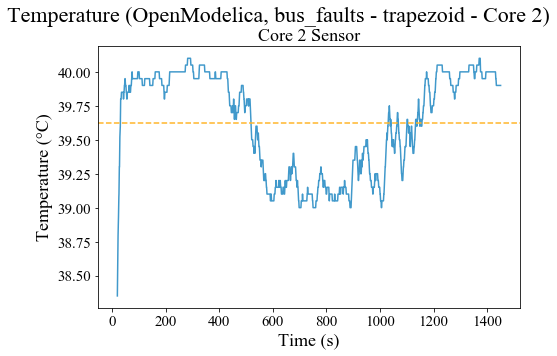

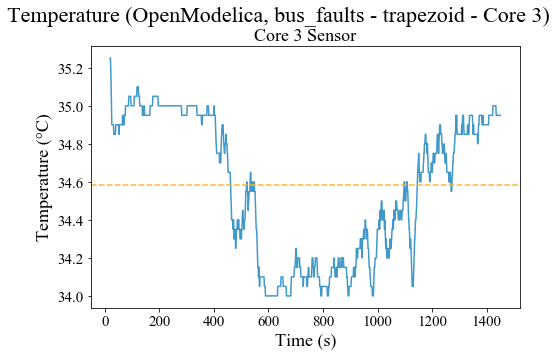

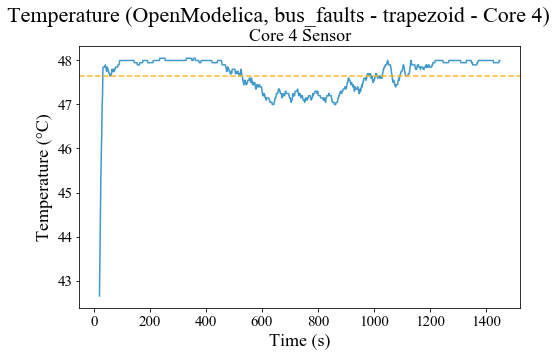

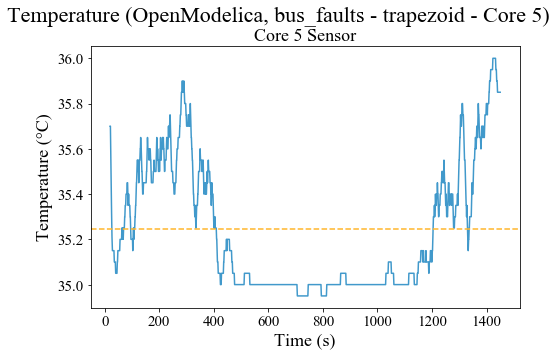

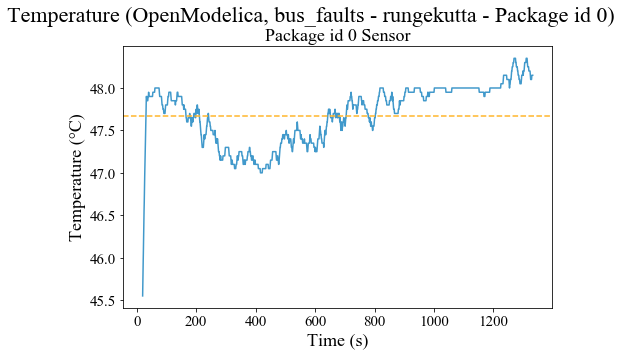

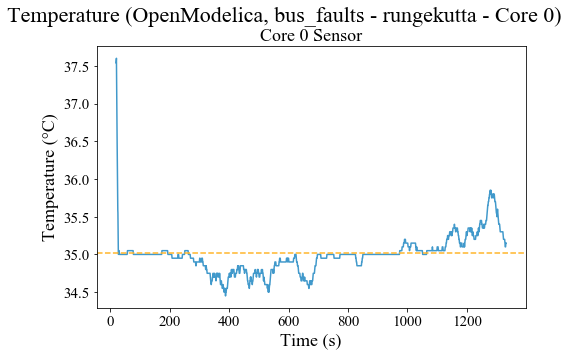

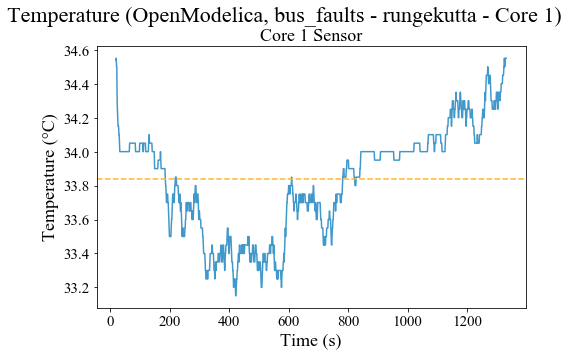

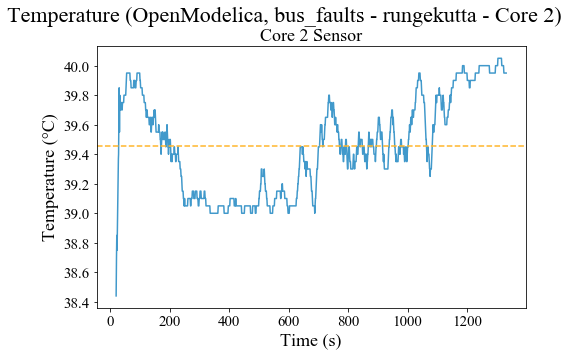

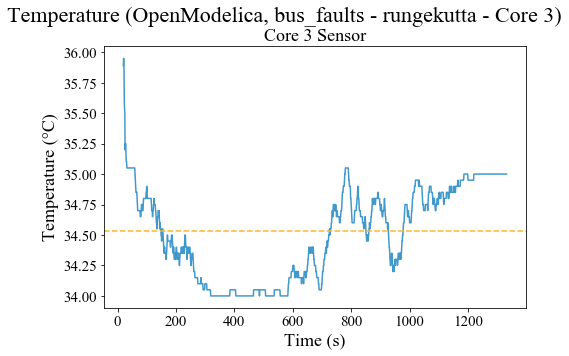

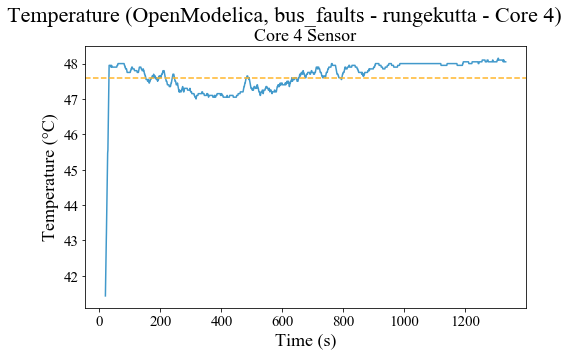

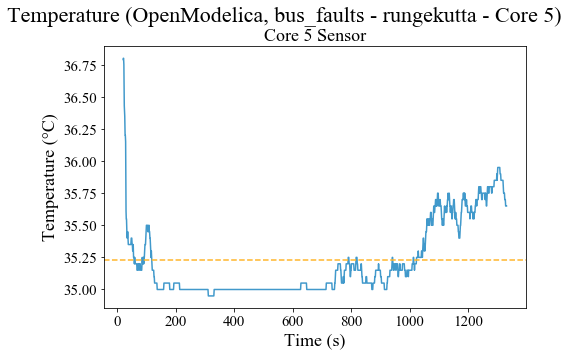

In [4]:
n_plot = 1

tools = list(df_temperature.keys())
experiments = list(df_temperature['Dymola'].keys())
solvers = list(df_temperature['Dymola']['initialization'].keys())
sensors = list(df_temperature['Dymola']['initialization']['euler'].columns[0:-1])

for tool in tools:
    for experiment in experiments:
        for solver in solvers:
            for sensor in sensors:
                fig_name = "Fig{r:02d}_Temperature_{t}_{e}_{s}_{sens}".format(r = n_plot, t = tool, e = experiment, s = solver, sens = sensor)
                plot_temperature(df_temperature, tool, experiment, solver, sensor, fig_name)
                n_plot += 1
                #break
            #break
        #break
    #break